In [1]:
import numpy as np
import scipy.stats as nst
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
import fit_routine as ft
sp.init_printing()

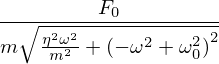

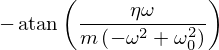

In [2]:
F0, m, omega0, omega, eta, k = sp.symbols("F0, m, omega0, omega, eta, k")
a_xw = F0/(m*sp.sqrt((omega0**2-omega**2)**2 + (omega*eta/m)**2))
var_a = [omega, omega0, m, eta, F0]
display(a_xw)
phi_w = -sp.atan((omega*eta/m)/(omega0**2-omega**2))
var_phi = [omega, omega0, m, eta]
display(phi_w)

In [3]:
phi, A, X, w, b = sp.symbols('phi, A, X, w, b')
eqA = sp.Eq(a_xw, A)
eqphi = sp.Eq(phi_w, phi)
eq1 = sp.Eq(X, F0/k)
eq2 = sp.Eq(w, omega/omega0)
eq3 = sp.Eq(b, eta/sp.sqrt(2*k*m))
eq4 = sp.Eq(omega0, sp.sqrt(k/m))

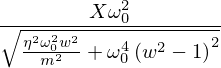

In [4]:
sols = sp.solve([eqA, eq1, eq2, eq3, eq4])
sols = sols[0]
sp.simplify(sols[A])

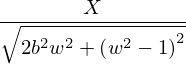

In [5]:
A_dim = X/sp.sqrt(2*w**2*b**2 + (w**2-1)**2)
display(A_dim)

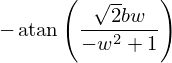

In [6]:
phi_dim = -sp.atan(sp.sqrt(2)*b*w/(1-w**2))
display(phi_dim)

## plots

In [7]:
# maak numerieke functies van de dimensiloze functies
A_dim_num = sp.lambdify([X, w, b], A_dim, "numpy")
phi_dim_num = sp.lambdify([X, w, b], phi_dim, "numpy")

In [9]:
import matplotlib as mpl

In [12]:
mpl.rcParams['axes.prop_cycle'] = ["xkcd:royal blue", "xkcd:vermillion", "xkcd:green apple", 
                                   "xkcd:mango", "xkcd:hot magenta", 
                                   "xkcd:dandelion", "xkcd:tree green", "xkcd:warm brown", 
                                   "xkcd:medium green", "xkcd:cyan", "xkcd:barney"]
mpl.rcParams['figure.figsize'] = (8, 5.33333333)
mpl.rcParams['fiure.dpi'] = 130

ValueError: Key axes.prop_cycle: object was not a string or Cycler instance: ['xkcd:royal blue', 'xkcd:vermillion', 'xkcd:green apple', 'xkcd:mango', 'xkcd:hot magenta', 'xkcd:dandelion', 'xkcd:tree green', 'xkcd:warm brown', 'xkcd:medium green', 'xkcd:cyan', 'xkcd:barney']

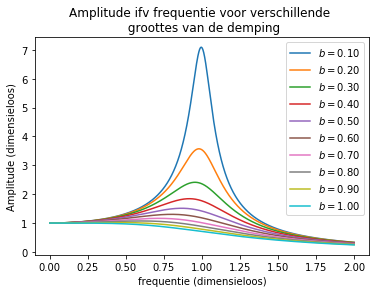

In [8]:
# definieer bereiken om te plotten
W = np.linspace(0, 2, 2000)
B = [(i+1)/10 for i in range(10)]
A_arr = [A_dim_num(1, W, demping) for demping in B]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(10):
    #ax = fig.add_subplot(5,2,i+1)
    ax.plot(W, A_arr[i], label="$b=%.2f$" %((i+1)/10))
    
ax.set_xlabel("frequentie (dimensieloos)")
ax.set_ylabel("Amplitude (dimensieloos)")
plt.title("Amplitude ifv frequentie voor verschillende \n groottes van de demping")
plt.legend()
    
plt.show()